In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def load(dir):
    f_list = glob.glob(dir + '/*/*/bestfit.dat')
    num_lines = sum(1 for line in open(f_list[0]))
    i = 0;
    data = np.zeros((len(f_list), num_lines)) 
    for f in f_list:
        data[i, :] = np.loadtxt(f)[:,1]
        i += 1
    return data

data_low_mut = load('data/low_mut')
data_high_mut = load('data/high_mut')
low_mut_100 = data_low_mut[:, 100]
high_mut_100 =  data_high_mut[:, 100]

n_generations = data_low_mut.shape[1]
x = np.arange(0, n_generations)

def med(data):
    median = np.zeros(data.shape[1])
    for i in range(0, len(median)):
        median[i] = np.median(data[:, i])
    return median

# compute the medians
med_low_mut = med(data_low_mut)
med_high_mut = med(data_high_mut)

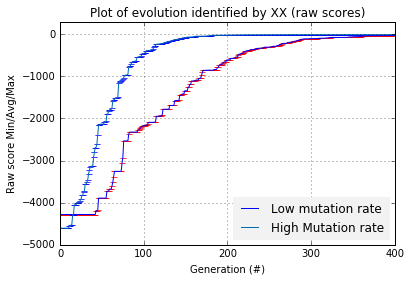

In [67]:
# axes(frameon=0)
plt.grid()
plt.errorbar(x, med_low_mut, yerr=0.1,  ecolor="r")
plt.xlabel('Generation (#)')
plt.ylabel('Raw score Min/Avg/Max')
plt.title("Plot of evolution identified by XX (raw scores)")
# plt.grid(True)
# plt.plot(x, med_low_mut, linewidth=2, linestyle='-', color='#B22400')
# plt.plot(x, med_high_mut, linewidth=2, linestyle='-', color='#006BB2')
plt.errorbar(x, med_high_mut, yerr=0.1, color='#006BB2', ecolor="b")
plt.xlim(0, 400)
plt.ylim(-5000, 300)
plt.xticks(np.arange(0, 500, 100))
frame = plt.legend(["Low mutation rate", "High Mutation rate"], loc=4).get_frame()

frame.set_edgecolor('0.95')
frame.set_facecolor('0.95')
plt.show()